In [1]:
# Start of ST10032014's PDAN8411 model testing
# Code snippets used from knowledge, the Programming for DANA textbook, and further research referenced where required
# Evaluation of this code is done inside the submitted Word document

In [2]:
# Importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and reading our dataset
df = pd.read_csv('cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Checking for any missing values in the dataset
print(df.info())
print(df.isnull().sum())

# Printing some basic statistics to view
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

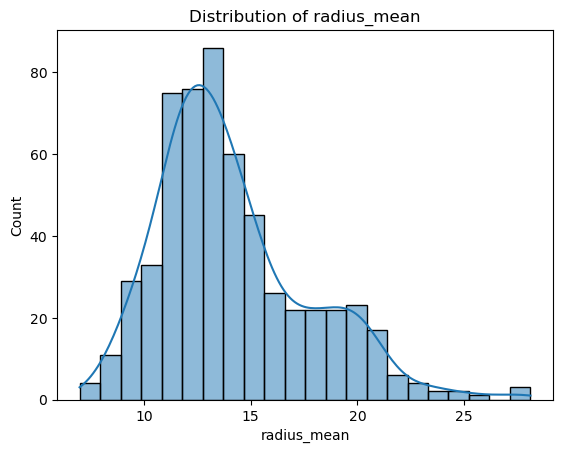

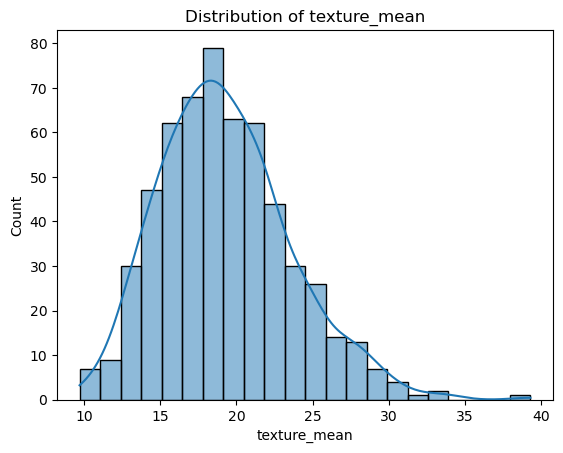

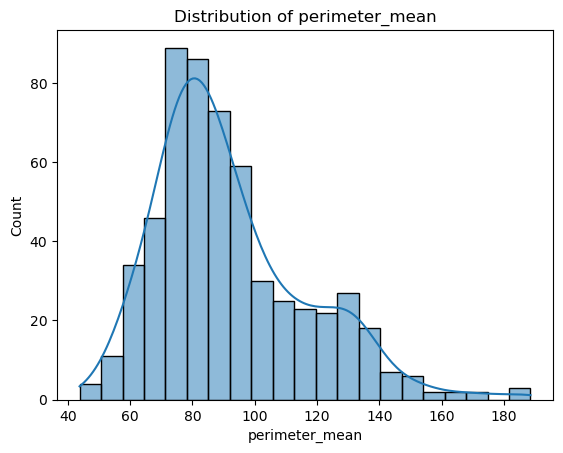

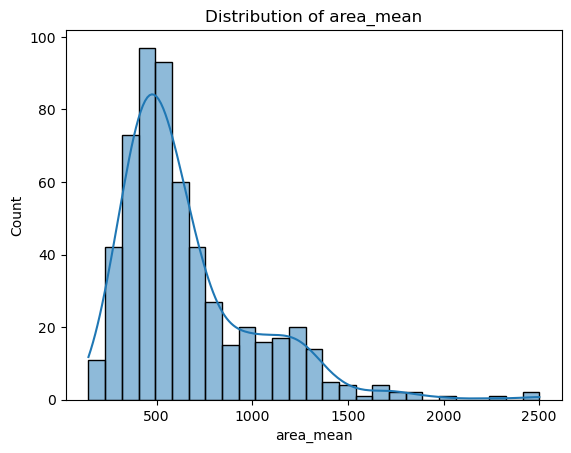

In [4]:
# Plot distribution of a few key features to understand their spread
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

for feature in features_to_plot:
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

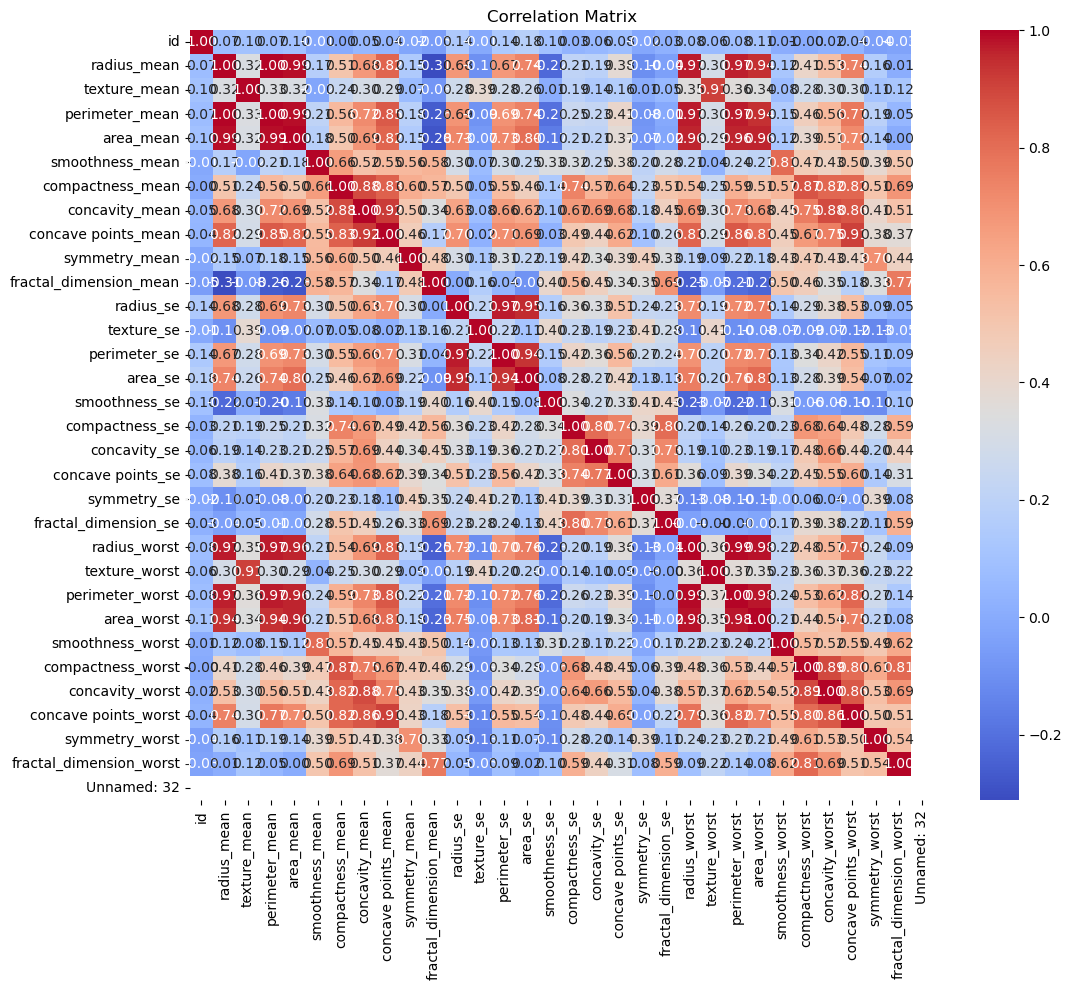

In [5]:
# Generate a correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

diagnosis
B    357
M    212
Name: count, dtype: int64


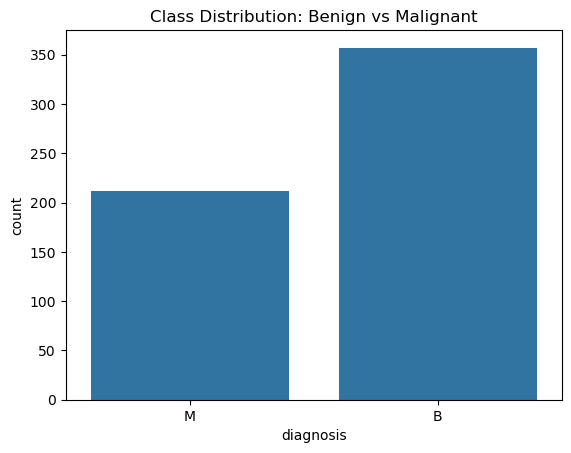

In [6]:
# Check how many benign vs malignant cases there are
print(df['diagnosis'].value_counts())

# Plot the distribution of diagnosis labels
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution: Benign vs Malignant")
plt.show()

In [9]:
# Convert target labels to binary: M = 1 (malignant), B = 0 (benign)
df['diagnosis_binary'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
# Drop non-informative columns (e.g., ID)
df = df.drop(columns=['id'])

In [11]:
# Define X (features) and y (target)
X = df.drop(columns=['diagnosis', 'diagnosis_binary'])  # all predictors
y = df['diagnosis_binary']                              # binary target

In [13]:
# Check for zero variance features
zero_var_cols = X.columns[X.nunique() <= 1]
print("Columns with zero variance:", zero_var_cols.tolist())

Columns with zero variance: ['Unnamed: 32']


In [14]:
# Drop said columns
X = X.drop(columns=zero_var_cols)

In [15]:
# Standardize all feature values to have zero mean and unit variance
# This ensures that all features contribute equally to the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X_scaled will be used in training

In [16]:
# Split the dataset into training and testing sets.
# 80% of the data is used for training and 20% for testing.
# The random_state ensures reproducibility of the split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [17]:
# Create and train a Logistic Regression model using the training data.
# This model will learn to classify tumors as malignant or benign based on the input features.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Use the trained model to make predictions on the test set.
y_pred = model.predict(X_test)

In [19]:
# Import evaluation metrics and assess the model's performance.
# Print accuracy, precision, recall, and F1-score to understand how well the model performs.
# Also display the full classification report with detailed metrics for each class.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Basic evaluation scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9761904761904762
Recall: 0.9534883720930233
F1 Score: 0.9647058823529412

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



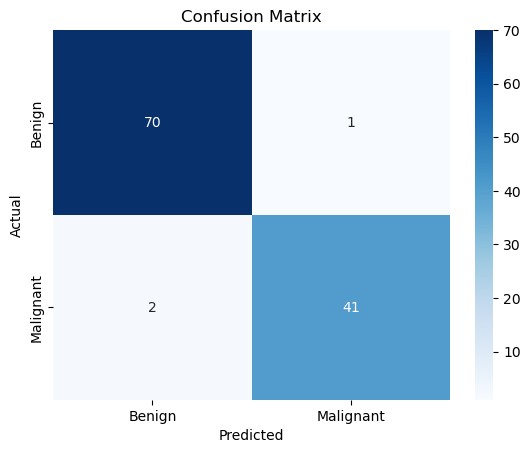

In [20]:
# Generate and visualize the confusion matrix to evaluate the model's classification results.
# This shows how many benign and malignant cases were correctly or incorrectly predicted.
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

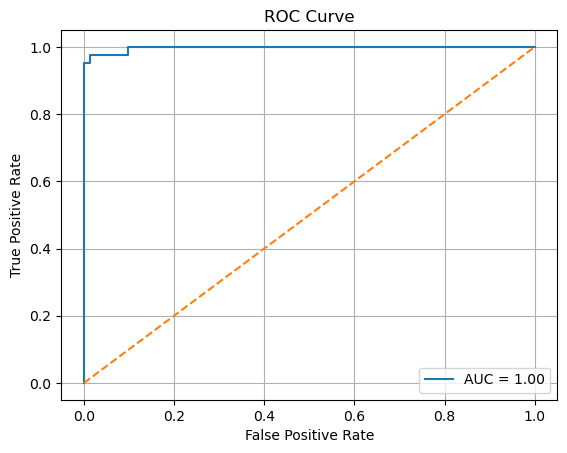

In [21]:
# Plot the Receiver Operating Characteristic (ROC) curve to visualize the model’s ability to separate classes.
# The AUC score indicates how well the model distinguishes between malignant and benign cases.
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
### Referemces ###
# Guido, A. C. (2016). Introduction to Machine Learning with Python. California: O’Reilly Media, Inc.
# https://web.stanford.edu/~jurafsky/slp3/5.pdf
# https://www.geeksforgeeks.org/understanding-logistic-regression/